In [64]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [65]:
(X_train_0, y_train_0),(X_test_0, y_test_0) = fashion_mnist.load_data()
number_of_features = X_train_0.shape[1] * X_train_0.shape[2]
unique_outcomes = np.unique(y_train_0)
number_of_unique_outcomes = len(unique_outcomes)

X_train = np.reshape(X_train_0, (len(X_train_0), number_of_features))
X_test = np.reshape(X_test_0, (len(X_test_0), number_of_features))

print("shape of training dataset after reshape: ", X_train.shape)
print()

y_train = keras.utils.to_categorical(y = y_train_0)
y_test = keras.utils.to_categorical(y = y_test_0)


shape of training dataset after reshape:  (60000, 784)



In [66]:
X_train_conv = np.reshape(X_train_0, (X_train_0.shape[0],X_train_0.shape[1],X_train_0.shape[2],1))
X_test_conv = np.reshape(X_test_0, (X_test_0.shape[0],X_test_0.shape[1],X_test_0.shape[2],1))
print("shape of convolution training data: ", X_train_conv.shape)
print()
print("shape of convolution testing data: ", X_test_conv.shape)


shape of convolution training data:  (60000, 28, 28, 1)

shape of convolution testing data:  (10000, 28, 28, 1)


In [67]:
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

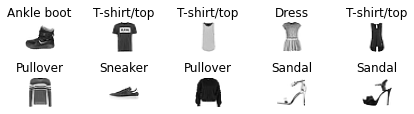

In [68]:
# Lets visualize the first 100 images from the dataset
for i in range(10):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.title(label_map[y_train_0[i]])
    plt.imshow(X_train_0[i], cmap='Greys')
    plt.tight_layout(h_pad=1.0)




Once again, there are 10 classes of image:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

As you might guess, this is a bigger challenge than the handwritten digits. Firstly, at 28 by 28 pixels much more fidelity is lost in this dataset compared to the digits dataset. Secondly, more pixels matter. In the digits dataset, we rarely care about the weight of the pixel, more or less what matters is if it's white or something else—we mostly cared about the edges between where someone had drawn and where they had not. Now internal differences in grayscale intensity are more informative, and comprise a larger amount of the image.

Let's quickly verify that a standard ANN that worked well in the context of MNIST fails in Fashion MNIST:


In [69]:
model = Sequential()

# input and first hidden layer
model.add(Dense(
                units = 64,
                activation = 'relu',
                input_shape = (number_of_features, )))
# 6 hidden layers
for i in range(6):
    model.add(Dense(
                    units = 64,
                    activation = 'relu'))
# output layer
model.add(Dense(
                units = number_of_unique_outcomes,
                activation = 'softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)               

In [70]:
model.compile(
              optimizer = 'nadam',
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=2,
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.8757 - accuracy: 0.7449 - val_loss: 0.5914 - val_accuracy: 0.8017
Epoch 2/10
 - 1s - loss: 0.4711 - accuracy: 0.8279 - val_loss: 0.4428 - val_accuracy: 0.8352
Epoch 3/10
 - 1s - loss: 0.4144 - accuracy: 0.8484 - val_loss: 0.4280 - val_accuracy: 0.8482
Epoch 4/10
 - 1s - loss: 0.3877 - accuracy: 0.8588 - val_loss: 0.4220 - val_accuracy: 0.8520
Epoch 5/10
 - 1s - loss: 0.3671 - accuracy: 0.8659 - val_loss: 0.3809 - val_accuracy: 0.8622
Epoch 6/10
 - 1s - loss: 0.3548 - accuracy: 0.8714 - val_loss: 0.3910 - val_accuracy: 0.8638
Epoch 7/10
 - 1s - loss: 0.3397 - accuracy: 0.8749 - val_loss: 0.3691 - val_accuracy: 0.8642
Epoch 8/10
 - 1s - loss: 0.3358 - accuracy: 0.8773 - val_loss: 0.3890 - val_accuracy: 0.8608
Epoch 9/10
 - 1s - loss: 0.3214 - accuracy: 0.8814 - val_loss: 0.3625 - val_accuracy: 0.8728
Epoch 10/10
 - 1s - loss: 0.3200 - accuracy: 0.8836 - val_loss: 0.3778 - val_accuracy: 0.8647


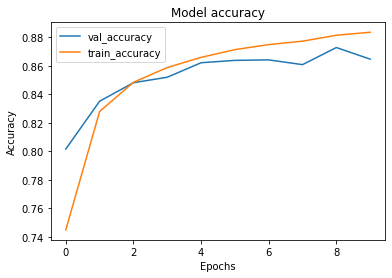

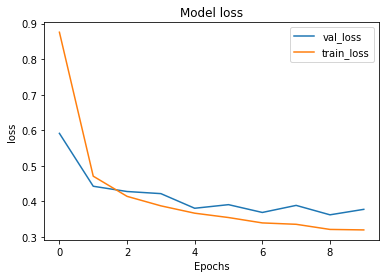

10000/10000 [==============================] - 0s 19us/step

Accuracy score for testing data:  0.86

Loss value for testing data:  0.39


In [71]:
def plot_graphs(history, X_test, y_test):
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['accuracy'])
    plt.title("Model accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['val_accuracy','train_accuracy'])
    plt.show()

    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.title("Model loss")
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend(['val_loss','train_loss'])
    plt.show()

    loss, accuracy = model.evaluate(x = X_test,
                                    y = y_test)
    print()
    print('Accuracy score for testing data: ', round(accuracy, 2))
    print()
    print('Loss value for testing data: ', round(loss, 2))

plot_graphs(history, X_test, y_test)

Not bad, but not nearly as good as we were able to achieve with regular MNIST. Plus some overfitting concerns are showing themselves in the chart...

### CNN Model

In [72]:
model = Sequential()

# add model layers. The first parameter is the number of filters to make at each layer.
# Meaning here the result of the first layer is 64 different "feature maps" or "activation maps"

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 input_shape = (X_train_0.shape[1],X_train_0.shape[2],1 )))

model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Flatten())
model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                250890    
Total params: 269,994
Trainable params: 269,994
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Previously, we flattened our training data, but now we INTEND on having 2D input data.
# X_train => 784 long vector
# X_train_0 => 28 x 28 matrix
# Plus one small caveat: we have to indicate the number of color channels explicitly as a dimension...
history = model.fit(x = X_train_conv,
                    y = y_train,
                    batch_size = 128,
                    epochs = 3,
                    verbose = 2,
                    validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
 - 102s - loss: 0.9916 - accuracy: 0.8446 - val_loss: 0.3595 - val_accuracy: 0.8737
Epoch 2/3
 - 118s - loss: 0.2928 - accuracy: 0.8949 - val_loss: 0.3290 - val_accuracy: 0.8802
Epoch 3/3
 - 105s - loss: 0.2458 - accuracy: 0.9105 - val_loss: 0.3292 - val_accuracy: 0.8897


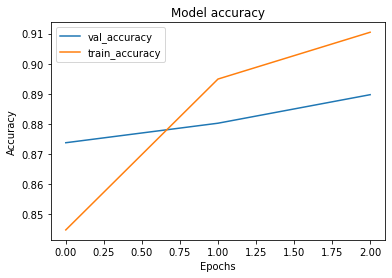

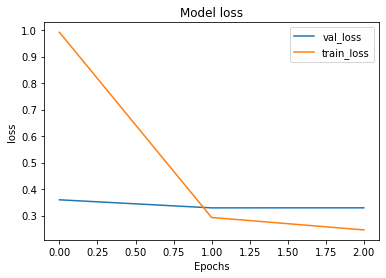

10000/10000 [==============================] - 3s 338us/step

Accuracy score for testing data:  0.88

Loss value for testing data:  0.35


In [74]:
plot_graphs(history = history, 
            X_test = X_test_conv, 
            y_test = y_test)

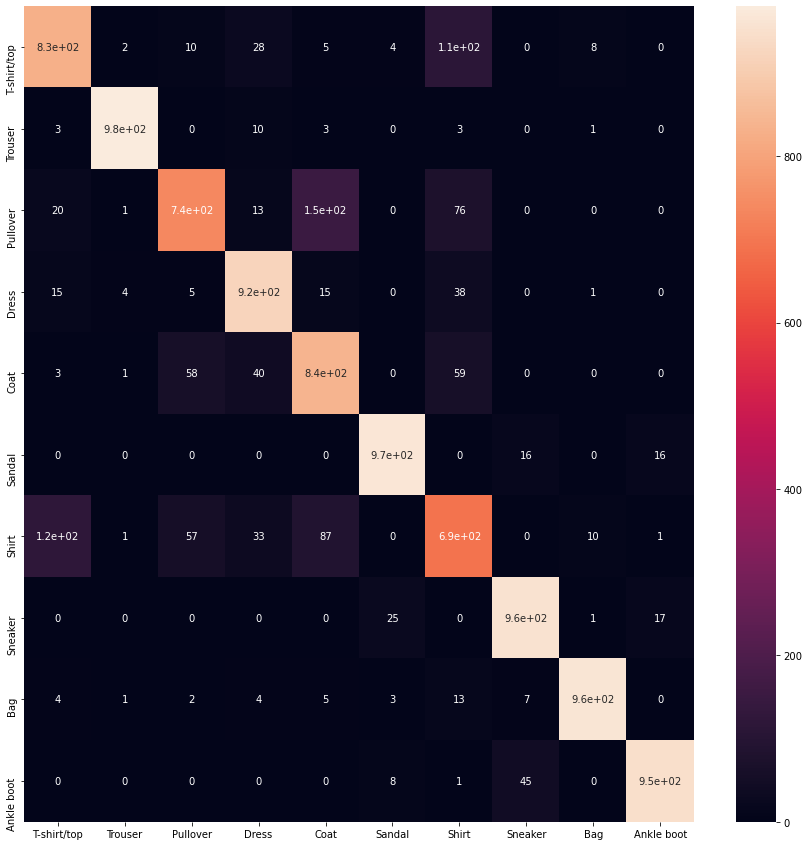

In [92]:
predictions = model.predict(x = X_test_conv)
predictions
cm = confusion_matrix(y_true = np.argmax(y_test, axis=1),
                      y_pred = np.argmax(predictions, axis=1))
plt.figure(figsize = (15,15))

name_labels = list(label_map.values())

# heatmap

sns.heatmap(data = cm,
            annot = True,
            xticklabels = name_labels,
            yticklabels = name_labels)

plt.show()

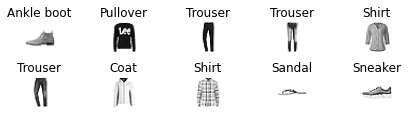

In [80]:
for i in range((10)):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.title(label_map[y_test_0[i]])
    plt.imshow(X_test_0[i], cmap='Greys')
    plt.tight_layout(h_pad=1.0)

* Now lets modify the model;
    * fewer filters
    * bigger kernel
    * new pooling layer

In [93]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (5, 5), 
                 activation = 'relu', 
                 padding = 'same', 
                 input_shape = (X_train_0.shape[1], X_train_0.shape[2],1)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 32, 
                 kernel_size = (5, 5), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(rate = 0.2))

# final output layer
model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               401664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)             

In [94]:
model.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Previously, we flattened our training data, but now we INTEND on having 2D input data.
# X_train => 784 long vector
# X_train_0 => 28 x 28 matrix
# Plus one small caveat: we have to indicate the number of color channels explicitly as a dimension...
history = model.fit(x = X_train_conv,
                    y = y_train,
                    batch_size = 128,
                    epochs = 5,
                    verbose = 2,
                    validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 54s - loss: 0.8266 - accuracy: 0.8073 - val_loss: 0.3619 - val_accuracy: 0.8642
Epoch 2/5
 - 54s - loss: 0.3356 - accuracy: 0.8781 - val_loss: 0.3185 - val_accuracy: 0.8832
Epoch 3/5
 - 57s - loss: 0.2922 - accuracy: 0.8919 - val_loss: 0.2991 - val_accuracy: 0.8905
Epoch 4/5
 - 58s - loss: 0.2610 - accuracy: 0.9038 - val_loss: 0.2911 - val_accuracy: 0.8920
Epoch 5/5
 - 54s - loss: 0.2391 - accuracy: 0.9103 - val_loss: 0.2855 - val_accuracy: 0.8960


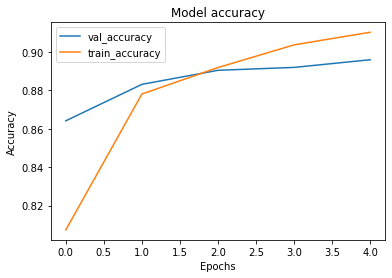

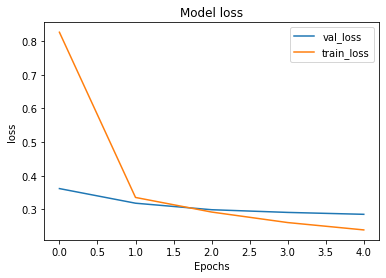

10000/10000 [==============================] - 2s 215us/step

Accuracy score for testing data:  0.89

Loss value for testing data:  0.31


In [95]:
plot_graphs(history = history, 
            X_test = X_test_conv, 
            y_test = y_test)

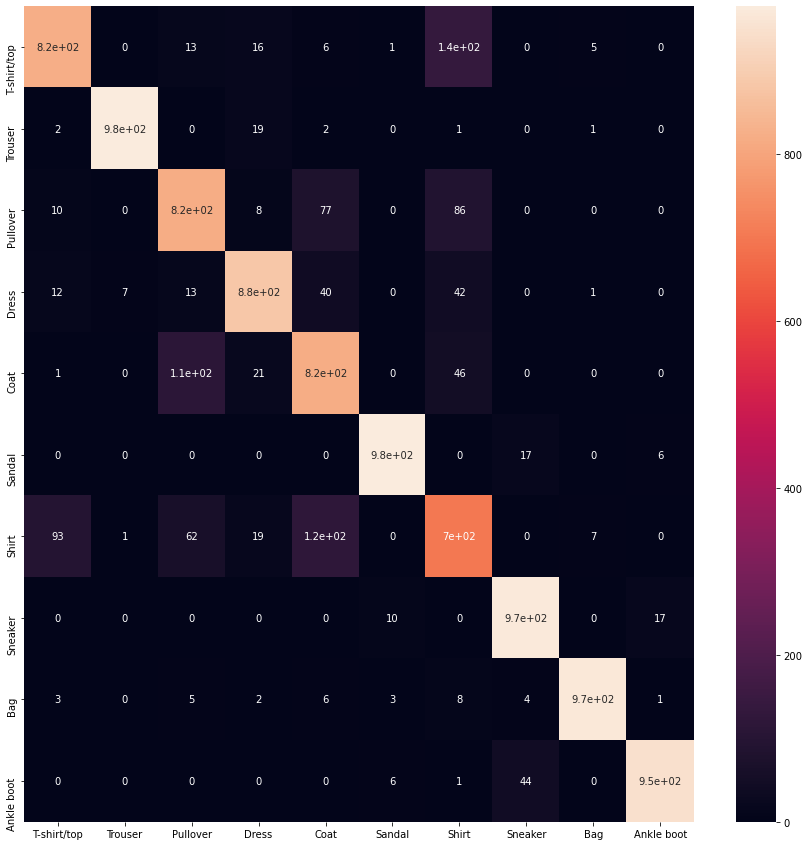

In [96]:
predictions = model.predict(x = X_test_conv)
predictions
cm = confusion_matrix(y_true = np.argmax(y_test, axis=1),
                      y_pred = np.argmax(predictions, axis=1))
plt.figure(figsize = (15,15))

name_labels = list(label_map.values())

# heatmap

sns.heatmap(data = cm,
            annot = True,
            xticklabels = name_labels,
            yticklabels = name_labels)

plt.show()

90% is pretty respectible, especially considering how speedy training was, and given that we didn't apply any data augmentation. Some state of the art networks get around 93-95% accuracy. It's also worth noting that we only really fail on comparing pullovers to coats, and tops to t-shirts.

* Now lets modify the model;
    * instead of maxpooling, we will use striding to do the downsampling

In [101]:
model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size = (5,5),
                 strides = (2,2),
                 activation = 'relu',
                 padding = 'same',
                 input_shape = (X_train_0.shape[1], X_train_0.shape[2], 1)))

model.add(Conv2D(filters = 32, 
                 kernel_size = (5,5),
                 strides = (2,2),
                 activation = 'relu',
                 padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 256,
                activation = 'relu'))
model.add(Dropout(rate = 0.2))

# output layer
model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          25632     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               401664    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                2570      
Total params: 430,698
Trainable params: 430,698
Non-trainable params: 0
_______________________________________________

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 14s - loss: 0.8260 - accuracy: 0.8054 - val_loss: 0.3685 - val_accuracy: 0.8623
Epoch 2/5
 - 16s - loss: 0.3423 - accuracy: 0.8747 - val_loss: 0.3200 - val_accuracy: 0.8785
Epoch 3/5
 - 19s - loss: 0.2860 - accuracy: 0.8945 - val_loss: 0.3117 - val_accuracy: 0.8845
Epoch 4/5
 - 18s - loss: 0.2500 - accuracy: 0.9061 - val_loss: 0.3082 - val_accuracy: 0.8870
Epoch 5/5
 - 18s - loss: 0.2243 - accuracy: 0.9156 - val_loss: 0.3144 - val_accuracy: 0.8890


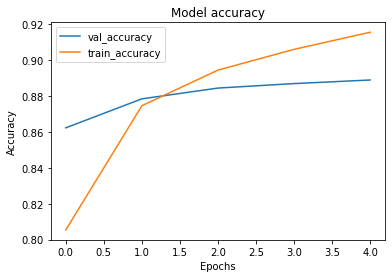

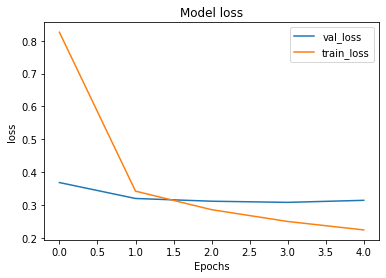

10000/10000 [==============================] - 1s 138us/step

Accuracy score for testing data:  0.89

Loss value for testing data:  0.33


In [102]:
model.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Previously, we flattened our training data, but now we INTEND on having 2D input data.
# X_train => 784 long vector
# X_train_0 => 28 x 28 matrix
# Plus one small caveat: we have to indicate the number of color channels explicitly as a dimension...
history = model.fit(x = X_train_conv,
                    y = y_train,
                    batch_size = 128,
                    epochs = 5,
                    verbose = 2,
                    validation_split = 0.1)

plot_graphs(history = history, 
            X_test = X_test_conv, 
            y_test = y_test)

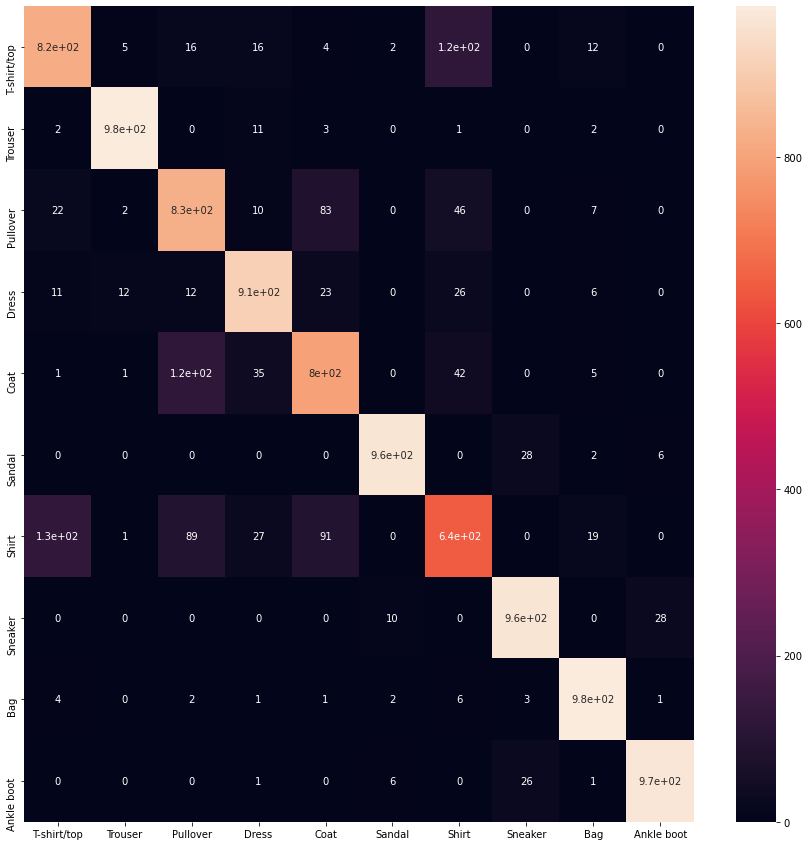

In [103]:
predictions = model.predict(x = X_test_conv)
predictions
cm = confusion_matrix(y_true = np.argmax(y_test, axis=1),
                      y_pred = np.argmax(predictions, axis=1))
plt.figure(figsize = (15,15))

name_labels = list(label_map.values())

# heatmap

sns.heatmap(data = cm,
            annot = True,
            xticklabels = name_labels,
            yticklabels = name_labels)

plt.show()

* Again the model will be modified;

In [104]:
model = Sequential()

# Downsample on the first layer via strides.
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 strides = (2,2),
                 padding = 'same',
                 activation = 'relu',
                 input_shape = (X_train_0.shape[1], X_train_0.shape[2], 1)))

# Once downsampled, don't down sample further (strides back to (1,1))
model.add(Conv2D(filters = 64,
                 kernel_size = (5,5),
                 strides = (1,1),
                 activation = 'relu',
                 padding = 'same'))

model.add(Flatten())

# NOTE, because we're downsampling much less I reduced the number of nodes in this layer.
# keeping it at 256 explodes the total parameter count and slows down learning a lot.

model.add(Dense(units = 64,
                activation = 'relu'))

model.add(Dropout(rate = 0.2))

model.add(Dense(units = number_of_unique_outcomes,
                activation = 'softmax'))

model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                802880    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                650       
Total params: 855,626
Trainable params: 855,626
Non-trainable params: 0
_______________________________________________

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 56s - loss: 0.7716 - accuracy: 0.8164 - val_loss: 0.3317 - val_accuracy: 0.8785
Epoch 2/5
 - 56s - loss: 0.3326 - accuracy: 0.8831 - val_loss: 0.3147 - val_accuracy: 0.8867
Epoch 3/5
 - 56s - loss: 0.2768 - accuracy: 0.8994 - val_loss: 0.3239 - val_accuracy: 0.8833
Epoch 4/5
 - 56s - loss: 0.2453 - accuracy: 0.9095 - val_loss: 0.2982 - val_accuracy: 0.8957
Epoch 5/5
 - 57s - loss: 0.2183 - accuracy: 0.9184 - val_loss: 0.3030 - val_accuracy: 0.8978


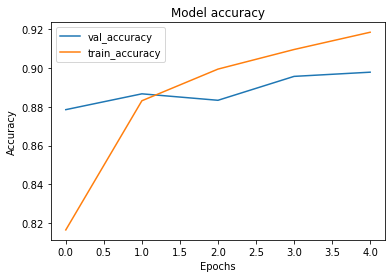

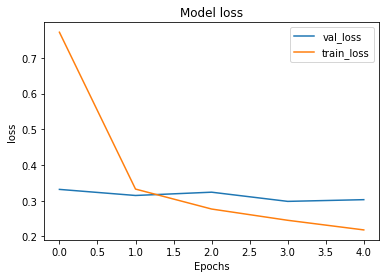

10000/10000 [==============================] - 3s 318us/step

Accuracy score for testing data:  0.89

Loss value for testing data:  0.31


In [105]:
model.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Previously, we flattened our training data, but now we INTEND on having 2D input data.
# X_train => 784 long vector
# X_train_0 => 28 x 28 matrix
# Plus one small caveat: we have to indicate the number of color channels explicitly as a dimension...
history = model.fit(x = X_train_conv,
                    y = y_train,
                    batch_size = 128,
                    epochs = 5,
                    verbose = 2,
                    validation_split = 0.1)

plot_graphs(history = history, 
            X_test = X_test_conv, 
            y_test = y_test)

* Pretty similar results. 
* This would be a good place to apply data augmentation or collect a bit more data. 
* We could continue to experiment with different models and probably find some small improvements as well. 
* Plus, these models might all improve some if we kept training. 
* They are overfitting a bit, but validation scores are still rising by the end.



### Model using skip connections

* One more important idea in CNNs is the idea of skip connections.
* To use these, we need to use the non-sequential model format

In [110]:
from keras.models import Model

inputs = keras.layers.Input(shape = (X_train_0.shape[1],X_train_0.shape[2],1))

cnn_1 = Conv2D(filters = 32, 
               kernel_size=(3, 3), 
               strides=(2,2), 
               activation='relu', 
               padding='same')(inputs)
cnn_2 = Conv2D(filters = 32, 
               kernel_size=(3, 3), 
               strides=(1,1), 
               activation='relu', 
               padding='same')(cnn_1)
cnn_3 = Conv2D(filters = 32, 
               kernel_size=(3, 3), 
               strides=(1,1), 
               activation='relu', 
               padding='same')(cnn_2)

add = keras.layers.Add() ([cnn_1, cnn_3])
cnn_4 = Conv2D(filters = 32, 
               kernel_size=(3, 3), 
               strides=(1,1), 
               activation='relu', 
               padding='same')(add)


flat = Flatten()(cnn_4)

dense_1 = Dense(units = 256,
                activation = 'relu') (flat)
drop = Dropout(rate = 0.2)(dense_1)
classifier = Dense(units = number_of_unique_outcomes,
                   activation = 'softmax')(drop)

model = Model(inputs=inputs, outputs=classifier)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 14, 14, 32)   320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 14, 14, 32)   9248        conv2d_26[0][0]                  
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 14, 14, 32)   9248        conv2d_27[0][0]                  
____________________________________________________________________________________________

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 55s - loss: 1.2135 - accuracy: 0.8193 - val_loss: 0.3384 - val_accuracy: 0.8793
Epoch 2/5
 - 60s - loss: 0.3041 - accuracy: 0.8888 - val_loss: 0.3034 - val_accuracy: 0.8922
Epoch 3/5
 - 65s - loss: 0.2407 - accuracy: 0.9118 - val_loss: 0.2963 - val_accuracy: 0.8937
Epoch 4/5
 - 58s - loss: 0.1981 - accuracy: 0.9260 - val_loss: 0.3148 - val_accuracy: 0.8960
Epoch 5/5
 - 57s - loss: 0.1662 - accuracy: 0.9368 - val_loss: 0.3074 - val_accuracy: 0.8917


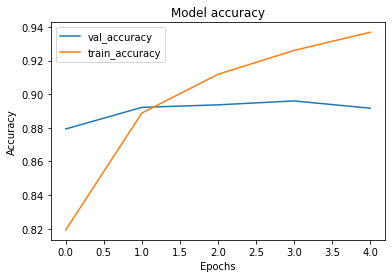

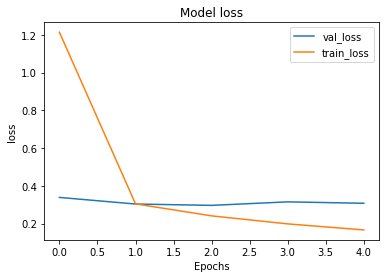

10000/10000 [==============================] - 3s 307us/step

Accuracy score for testing data:  0.89

Loss value for testing data:  0.34


In [111]:
model.compile(
              optimizer = 'adam',
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Previously, we flattened our training data, but now we INTEND on having 2D input data.
# X_train => 784 long vector
# X_train_0 => 28 x 28 matrix
# Plus one small caveat: we have to indicate the number of color channels explicitly as a dimension...
history = model.fit(x = X_train_conv,
                    y = y_train,
                    batch_size = 128,
                    epochs = 5,
                    verbose = 2,
                    validation_split = 0.1)

plot_graphs(history = history, 
            X_test = X_test_conv, 
            y_test = y_test)